In [1]:
import pandas as pd
import numpy as np
df = pd.read_excel("maskeddata.xlsx")
df.head(5)

,Nickname,StartTime,EndTime,LogTime,EventType,data
0,Aday_1,2021-08-18 02:58:19.078,2021-08-18 02:58:53.489,2021-08-18 02:58:33.771,MOUSE,[Left-click]
1,Aday_1,2021-08-18 02:58:19.078,2021-08-18 02:58:53.489,2021-08-18 02:58:36.336,MOUSE,[Left-click]
2,Aday_1,2021-08-18 02:58:19.078,2021-08-18 02:58:53.489,2021-08-18 02:58:43.731,MOUSE,[Left-click]
3,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:53:55.090,2021-08-18 03:45:42.341,MOUSE,[Left-click]
4,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:53:55.090,2021-08-18 03:45:44.500,MOUSE,[Left-click]


In [2]:
df.groupby("Nickname").count()

,StartTime,EndTime,LogTime,EventType,data
Nickname,,,,,
Aday_1,313,313,313,313,313
Aday_2,27,27,27,27,27
Aday_3,392,392,392,392,392
Aday_4,710,710,710,710,710
Aday_5,28,28,28,28,28


In [3]:
df.dtypes

Nickname             object
StartTime    datetime64[ns]
EndTime      datetime64[ns]
LogTime      datetime64[ns]
EventType            object
data                 object
dtype: object

In [4]:
df.columns


Index(['Nickname', 'StartTime', 'EndTime', 'LogTime', 'EventType', 'data'], dtype='object')

In [5]:
df_n=df.copy()

In [6]:
df_n=df_n.convert_dtypes()
df_n['data']=df_n['data'].astype('string')
df_n.dtypes

Nickname             string
StartTime    datetime64[ns]
EndTime      datetime64[ns]
LogTime      datetime64[ns]
EventType            string
data                 string
dtype: object

In [7]:
len(df_n)

1470

In [9]:
import datetime
timespan=[(df_n['LogTime'][1]-df_n['LogTime'][0]).total_seconds()]
timespanfa=[0]
for i in range(1,len(df_n)-1):
    #if df_n['sEssion_id'][i-1] == df_n['sEssion_id'][i]:
    if df_n['Nickname'][i-1] == df_n['Nickname'][i]:
        timespan.append((df_n['LogTime'][i+1]-df_n['LogTime'][i]).total_seconds())
        timespanfa.append((df_n['LogTime'][i]-df_n['LogTime'][i-1]).total_seconds())
    else:
        timespan.append(0)
        timespanfa.append(0)
timespan.append(0)
timespanfa.append((df_n['LogTime'][len(df_n)-1]-df_n['LogTime'][len(df_n)-2]).total_seconds())
df_n['time']=timespan
df_n['time_af']=timespanfa
df_n

,Nickname,StartTime,EndTime,LogTime,EventType,data,time,time_af
0,Aday_1,2021-08-18 02:58:19.078,2021-08-18 02:58:53.489,2021-08-18 02:58:33.771,MOUSE,[Left-click],2.565,0.000
1,Aday_1,2021-08-18 02:58:19.078,2021-08-18 02:58:53.489,2021-08-18 02:58:36.336,MOUSE,[Left-click],7.395,2.565
2,Aday_1,2021-08-18 02:58:19.078,2021-08-18 02:58:53.489,2021-08-18 02:58:43.731,MOUSE,[Left-click],2818.610,7.395
3,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:53:55.090,2021-08-18 03:45:42.341,MOUSE,[Left-click],2.159,2818.610
4,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:53:55.090,2021-08-18 03:45:44.500,MOUSE,[Left-click],0.979,2.159
...,...,...,...,...,...,...,...,...
1465,Aday_5,2021-08-19 03:11:16.358,2021-08-19 03:16:21.005,2021-08-19 03:11:31.160,KEY_CHAR,i,0.160,0.216
1466,Aday_5,2021-08-19 03:11:16.358,2021-08-19 03:16:21.005,2021-08-19 03:11:31.320,KEY_CHAR,n,0.290,0.160
1467,Aday_5,2021-08-19 03:11:16.358,2021-08-19 03:16:21.005,2021-08-19 03:11:31.610,KEY_CHAR,,0.678,0.290
1468,Aday_5,2021-08-19 03:11:16.358,2021-08-19 03:16:21.005,2021-08-19 03:11:32.288,KEY_CHAR,j,0.224,0.678


In [16]:
df_n=df_n.loc[(df_n['Nickname']!='Muslum.Gurses') & (df_n['EventType']!='MOUSE'),["Nickname","StartTime","LogTime","EventType", "data","time","time_af"]]

In [17]:
df_n

,Nickname,StartTime,LogTime,EventType,data,time,time_af
9,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:45:57.469,KEY_CHAR,n,0.196,0.972
10,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:45:57.665,KEY_CHAR,o,0.293,0.196
11,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:45:57.958,KEY_CHAR,t,1.157,0.293
12,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:45:59.115,KEY_CHAR,e,0.952,1.157
13,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:46:00.067,KEY_CHAR,p,0.134,0.952
...,...,...,...,...,...,...,...
1465,Aday_5,2021-08-19 03:11:16.358,2021-08-19 03:11:31.160,KEY_CHAR,i,0.160,0.216
1466,Aday_5,2021-08-19 03:11:16.358,2021-08-19 03:11:31.320,KEY_CHAR,n,0.290,0.160
1467,Aday_5,2021-08-19 03:11:16.358,2021-08-19 03:11:31.610,KEY_CHAR,,0.678,0.290
1468,Aday_5,2021-08-19 03:11:16.358,2021-08-19 03:11:32.288,KEY_CHAR,j,0.224,0.678


In [18]:
df_n['data']=df_n['data'].replace("\[(.*?)\]",'',regex=True)
df_n['data']=df_n['data'].replace("[/ +/]",'',regex=True)
df_n['data']=df_n['data'].apply(lambda x: x.lower() if type(x) == str else x)


In [19]:
df_n[['data','time','time_af']].head(50)

,data,time,time_af
9,n,0.196,0.972
10,o,0.293,0.196
11,t,1.157,0.293
12,e,0.952,1.157
13,p,0.134,0.952
14,a,2.057,0.134
17,t,0.261,2.765
18,h,0.099,0.261
19,e,0.140,0.099
20,,0.264,0.140


C:\Users\suca\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\suca\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 47.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\suca\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 21.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\suca\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\suca\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 33.3% of the points canno

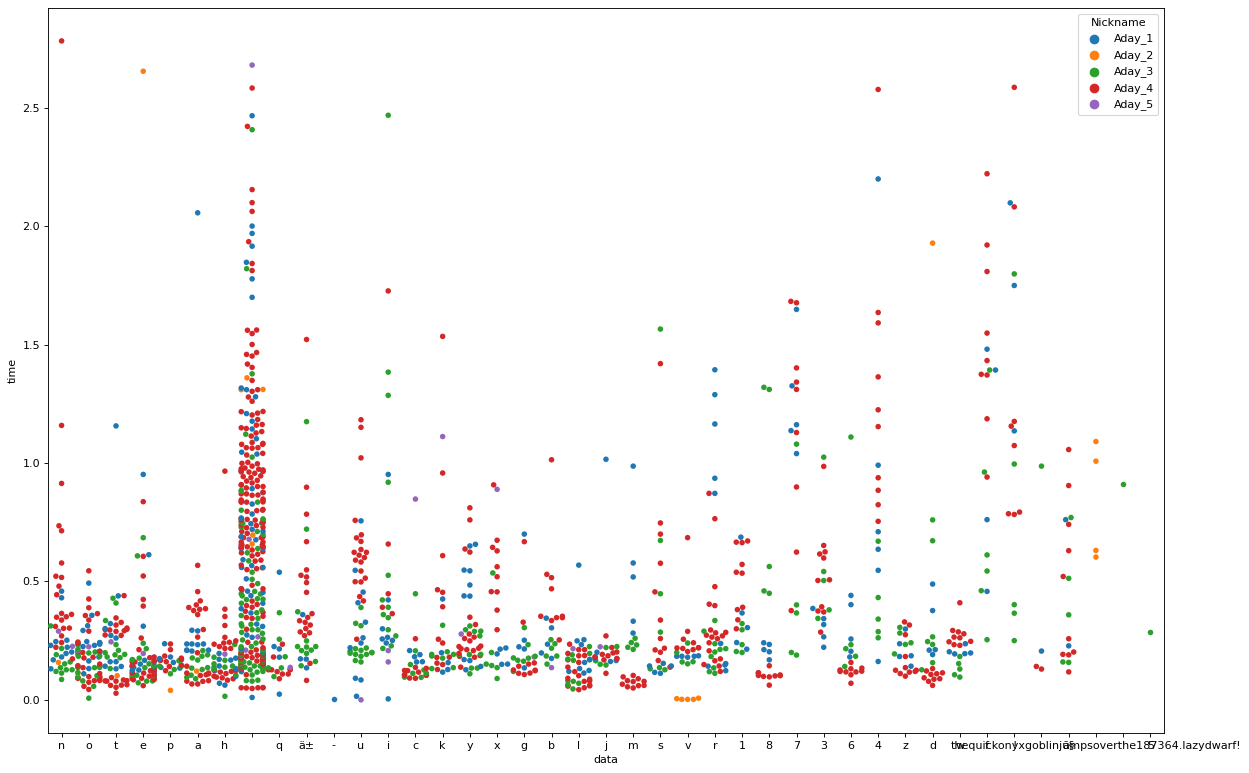

In [20]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns

figure(figsize=(18, 12), dpi=80)
sns.swarmplot(x="data", y="time",hue="Nickname",  data=df_n[(df_n['time']<3)])
plt.show()

C:\Users\suca\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 45.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\suca\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 35.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\suca\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 8.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\suca\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 66.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\suca\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points canno

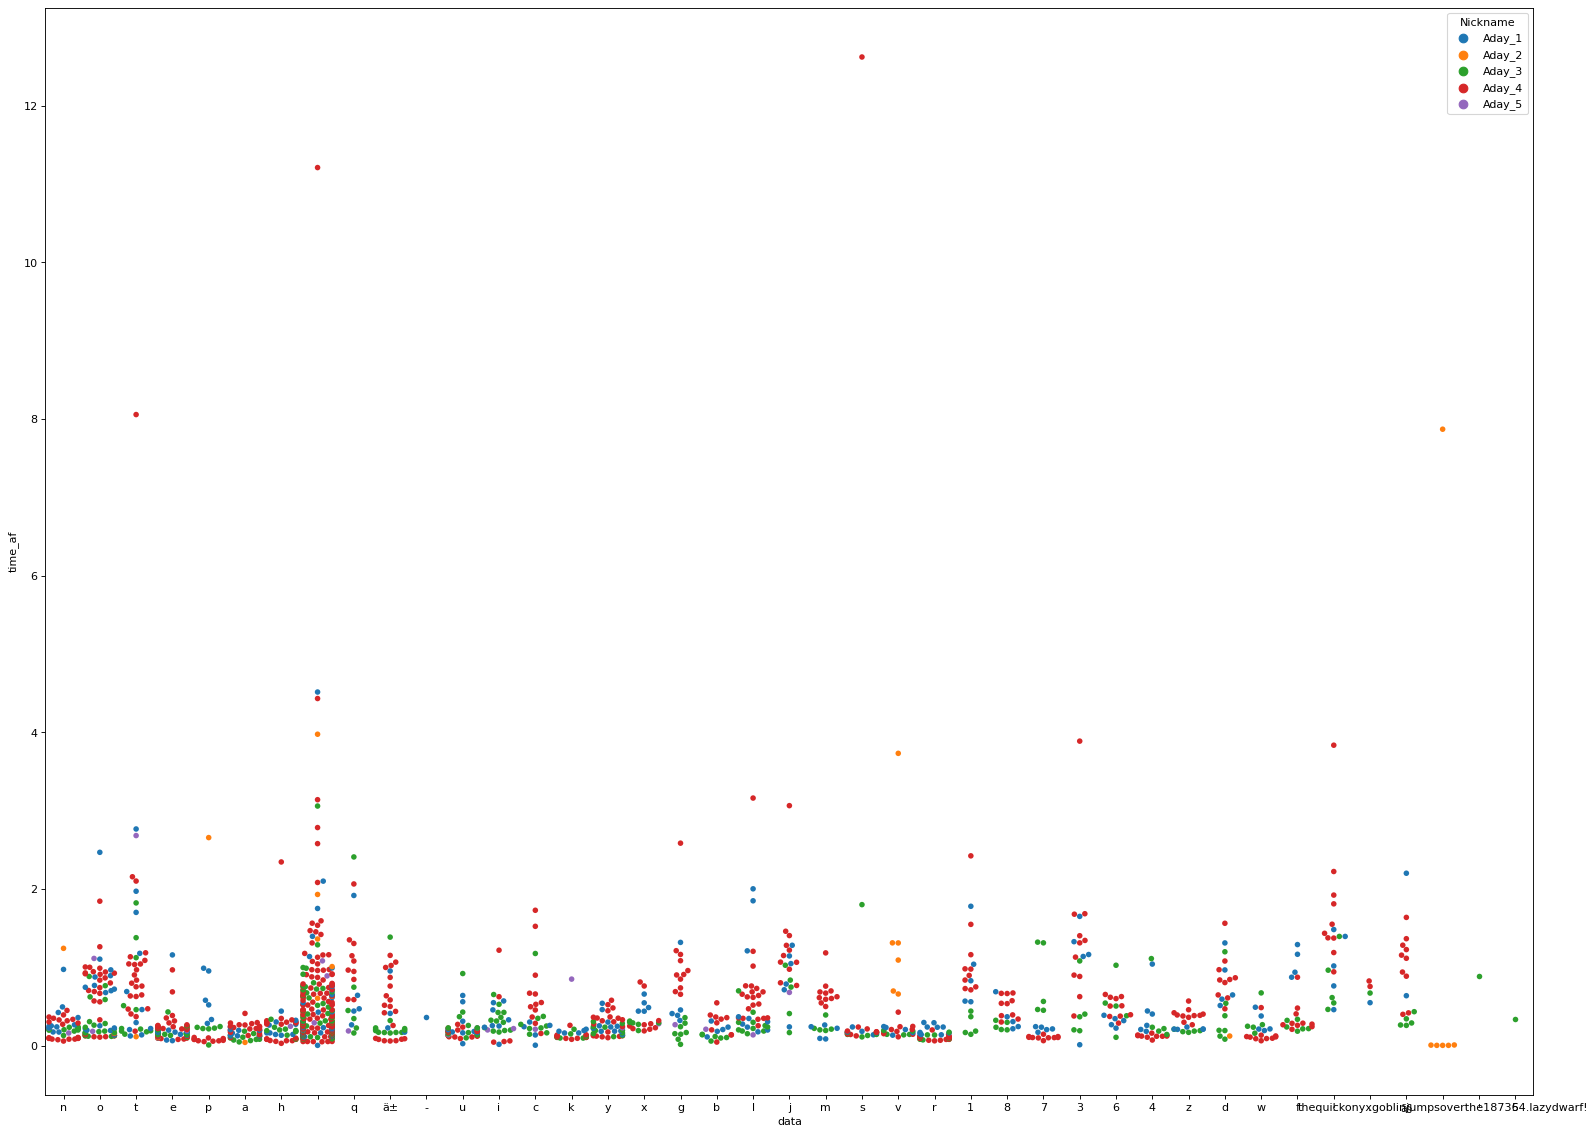

In [21]:
figure(figsize=(24, 18), dpi=80)
sns.swarmplot(x="data", y="time_af",hue="Nickname",  data=df_n)
plt.show()

In [22]:
df_n[(df_n['data']=='')& (df_n['EventType']=='KEY_CHAR')]

,Nickname,StartTime,LogTime,EventType,data,time,time_af
20,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:46:11.626,KEY_CHAR,,0.264,0.140
32,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:46:15.952,KEY_CHAR,,0.767,0.426
37,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:46:18.411,KEY_CHAR,,0.454,0.219
44,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:46:20.562,KEY_CHAR,,0.785,0.230
50,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:46:22.299,KEY_CHAR,,0.744,0.154
...,...,...,...,...,...,...,...
1426,Aday_4,2021-08-18 06:46:13.382,2021-08-18 06:49:32.522,KEY_CHAR,,0.685,0.118
1433,Aday_4,2021-08-18 06:46:13.382,2021-08-18 06:49:34.978,KEY_CHAR,,1.561,0.349
1450,Aday_5,2021-08-19 03:11:16.358,2021-08-19 03:11:25.846,KEY_CHAR,,0.186,0.196
1460,Aday_5,2021-08-19 03:11:16.358,2021-08-19 03:11:30.153,KEY_CHAR,,0.266,0.889


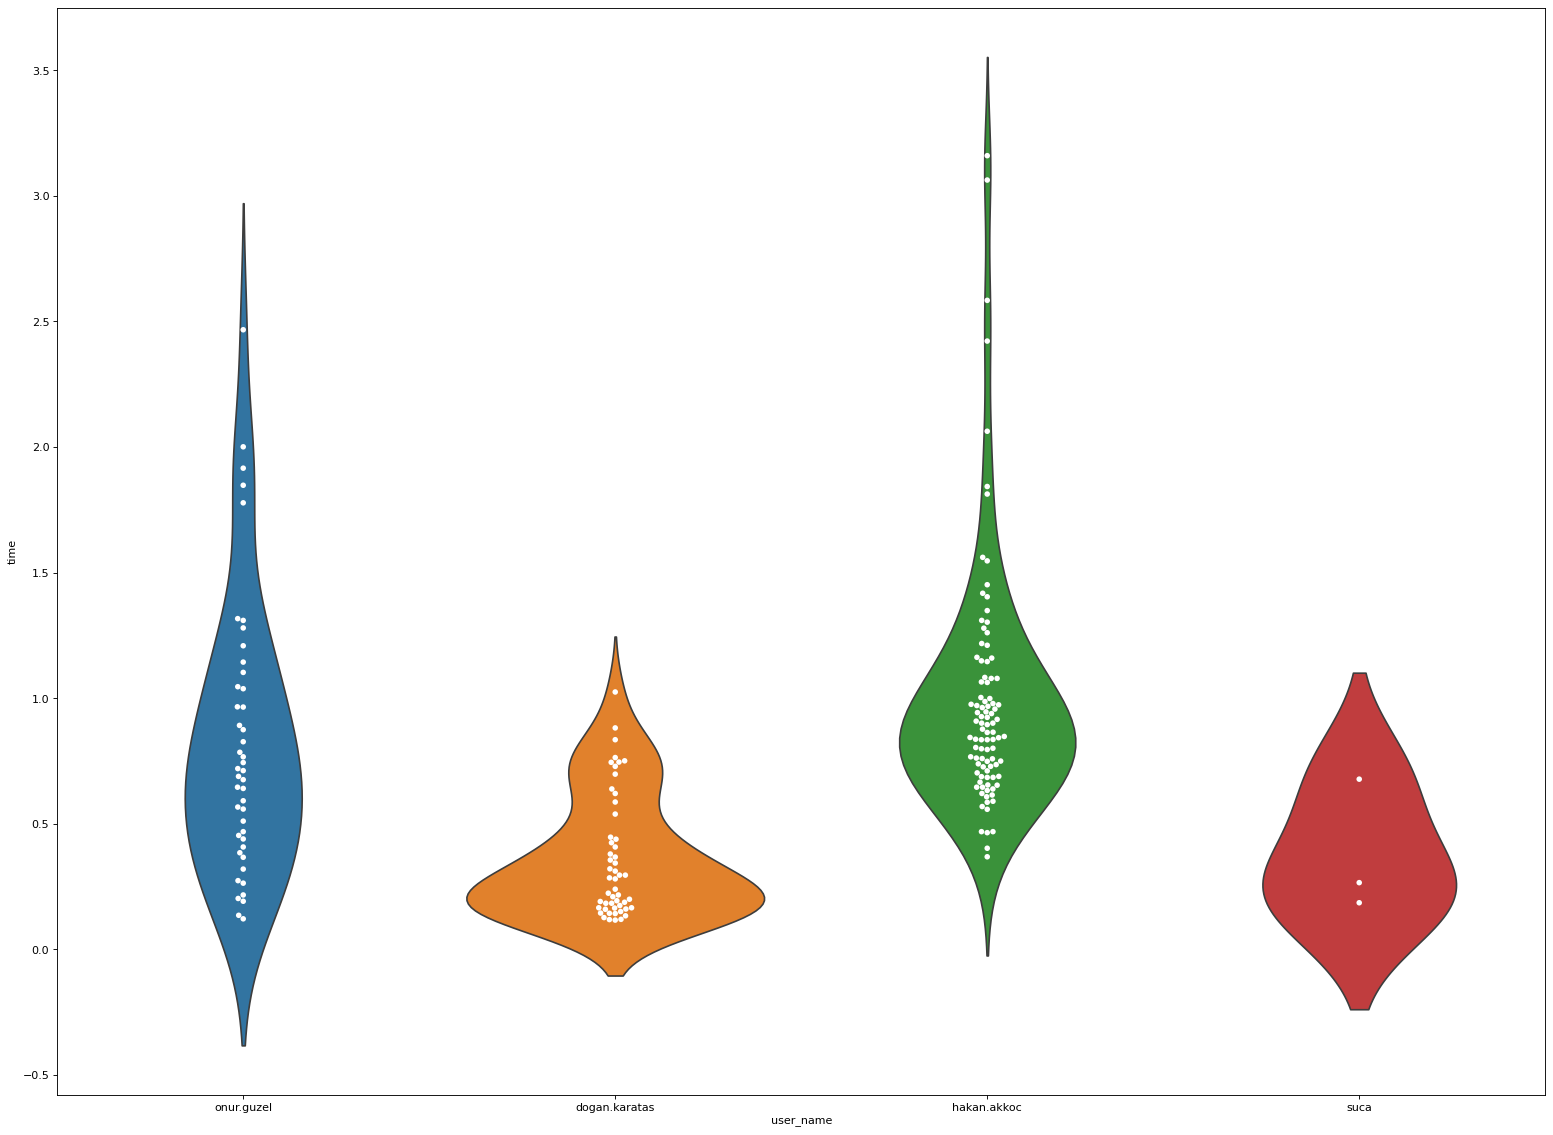

In [22]:
figure(figsize=(24, 18), dpi=80)
sns.violinplot(x="Nickname", y="time", data=df_n[(df_n['data']=='')& (df_n['event_type']=='KEY_CHAR')], inner=None)
sns.swarmplot(x="Nickname", y="time", data=df_n[(df_n['data']=='')& (df_n['event_type']=='KEY_CHAR')],
                   color="white", edgecolor="gray")
plt.show()

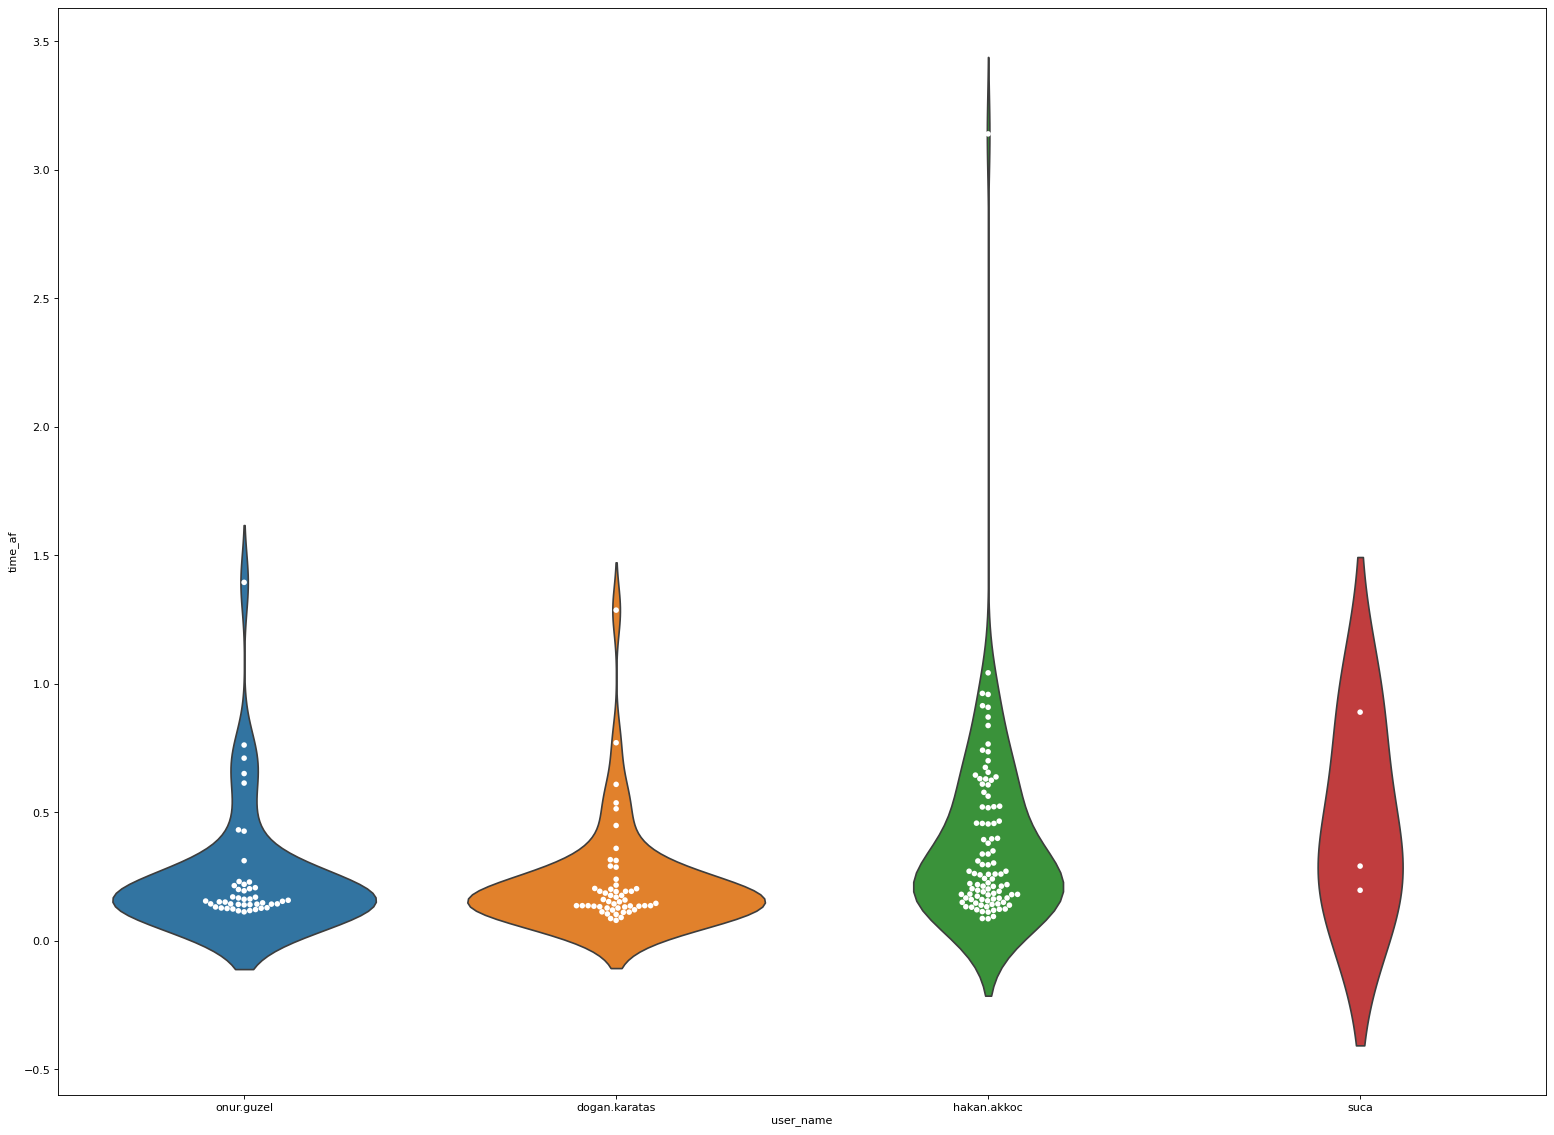

In [23]:
figure(figsize=(24, 18), dpi=80)
sns.violinplot(x="user_name", y="time_af", data=df_n[(df_n['data']=='')& (df_n['event_type']=='KEY_CHAR')], inner=None)
sns.swarmplot(x="user_name", y="time_af", data=df_n[(df_n['data']=='')& (df_n['event_type']=='KEY_CHAR')],
                   color="white", edgecolor="gray")
plt.show()

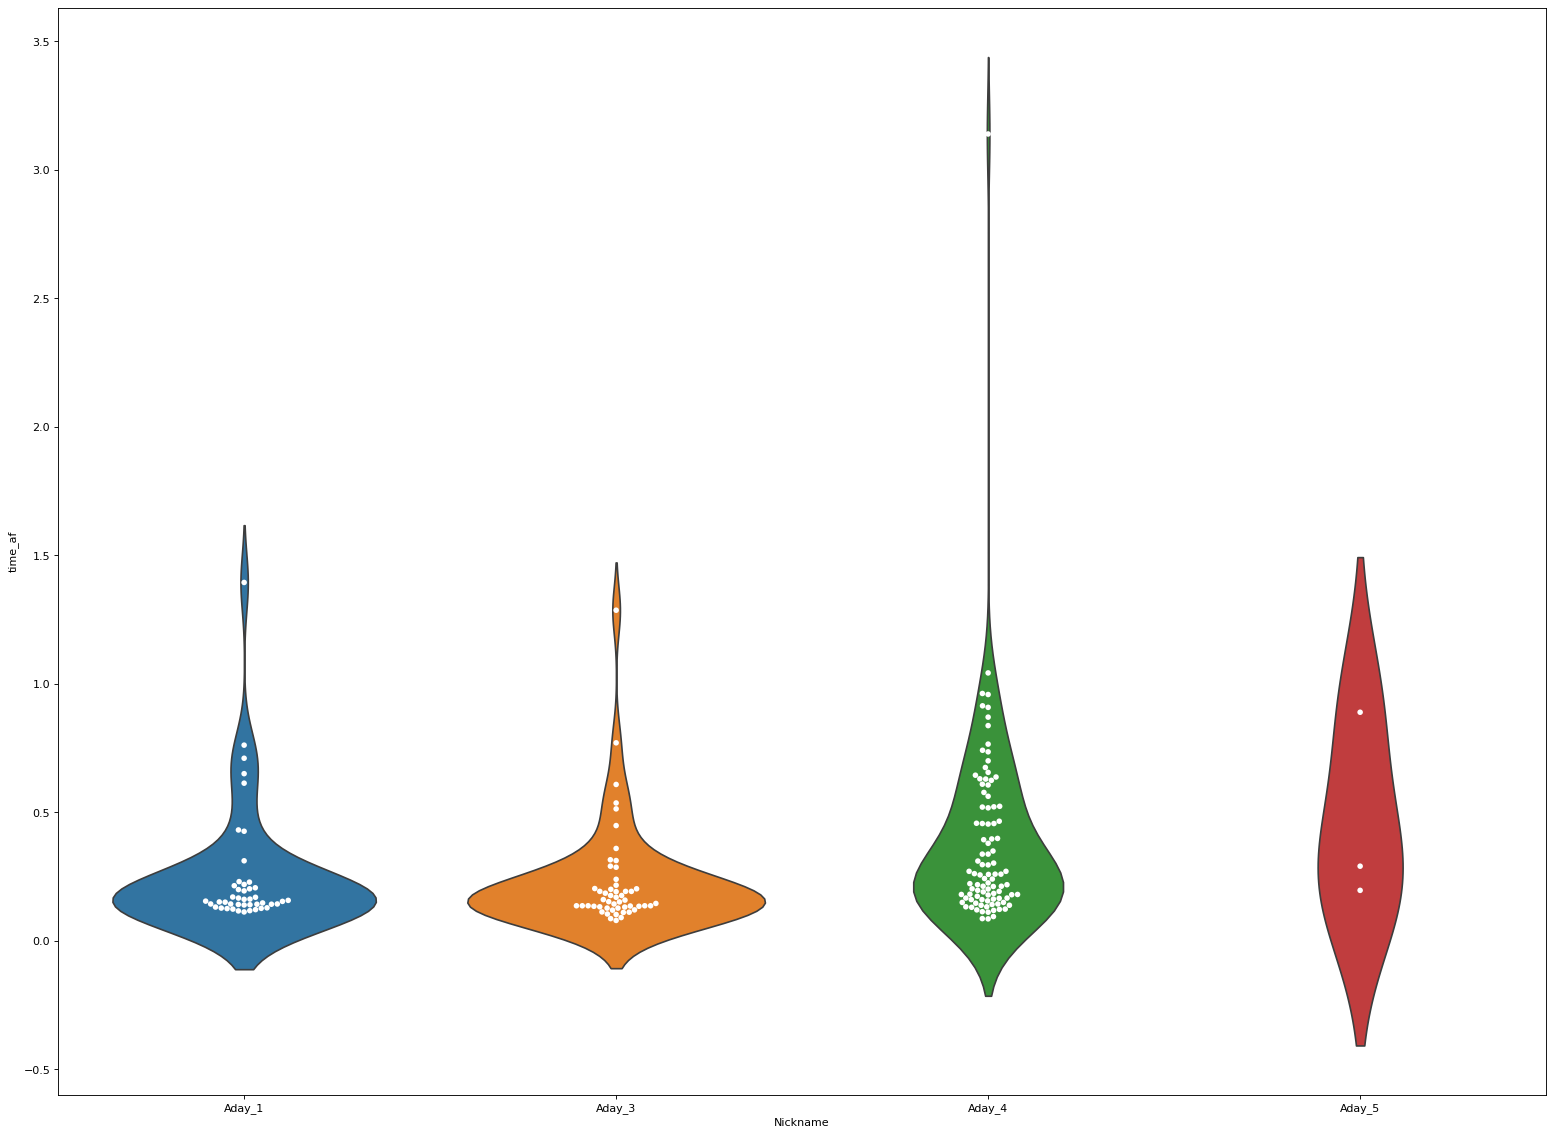

In [23]:
figure(figsize=(24, 18), dpi=80)
sns.violinplot(x="Nickname", y="time_af", data=df_n[(df_n['data']=='')& (df_n['EventType']=='KEY_CHAR')], inner=None)
sns.swarmplot(x="Nickname", y="time_af", data=df_n[(df_n['data']=='')& (df_n['EventType']=='KEY_CHAR')],
                   color="white", edgecolor="gray")
plt.show()

<AxesSubplot:xlabel='data', ylabel='time'>

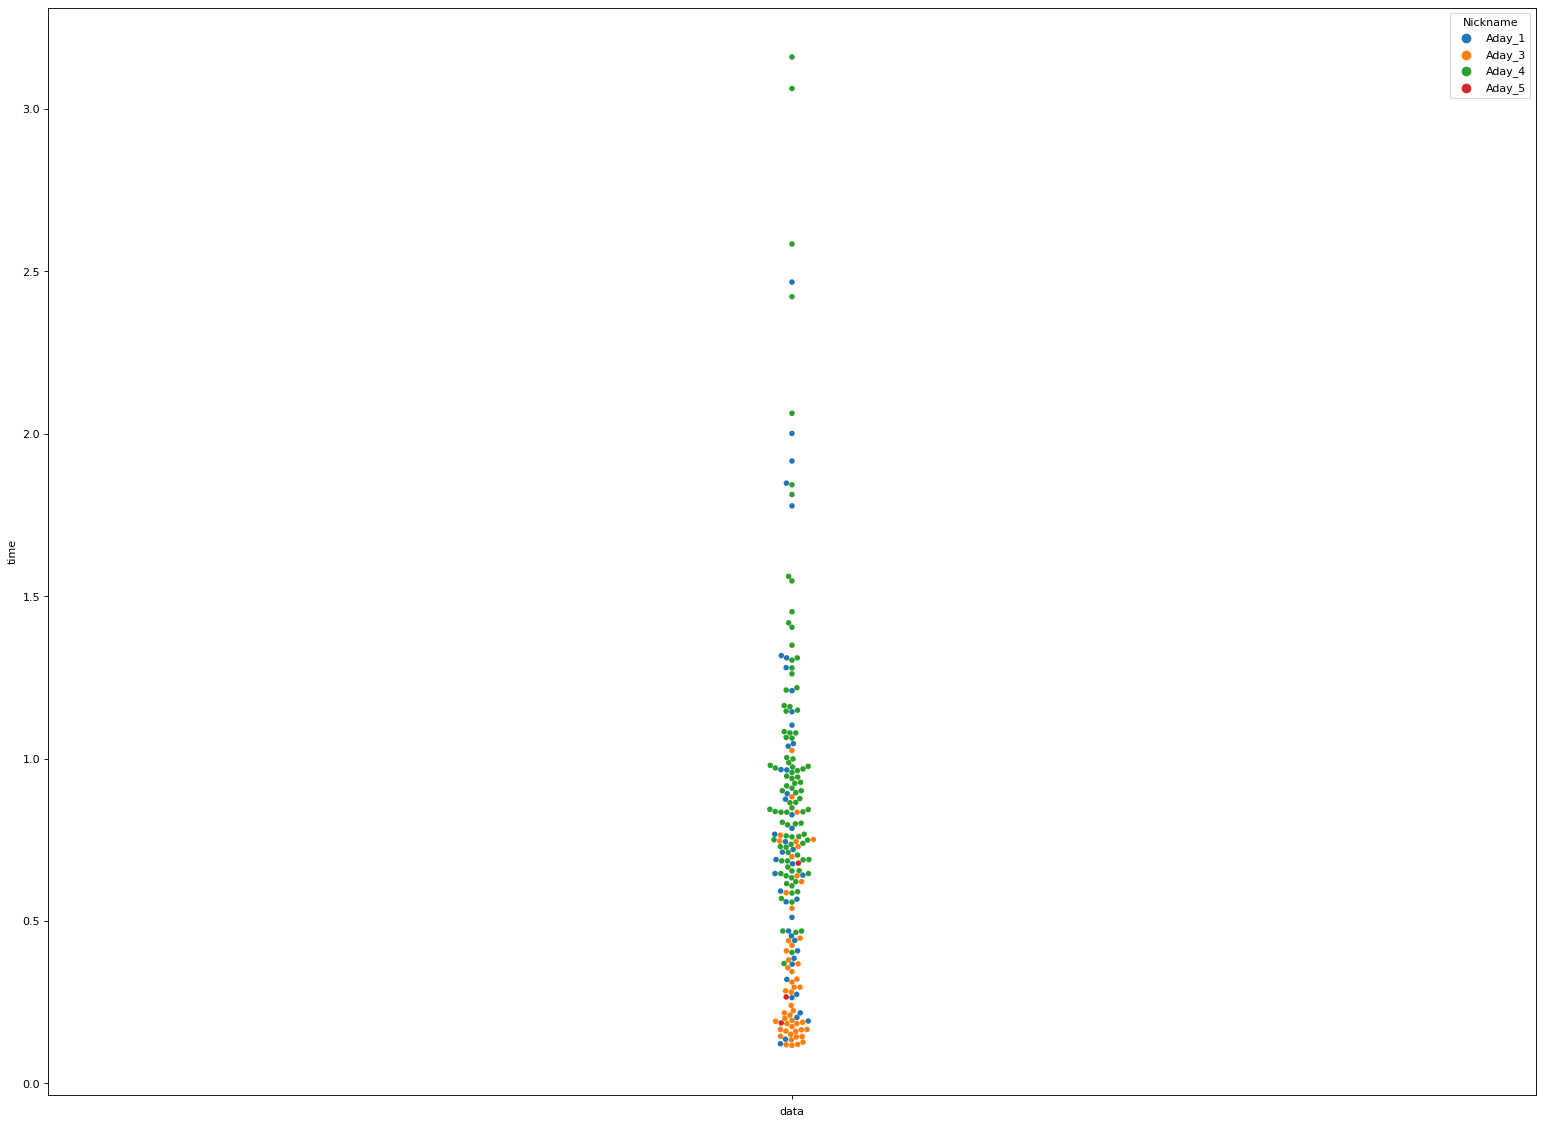

In [24]:
figure(figsize=(24, 18), dpi=80)
sns.swarmplot(x="data", y="time", hue='Nickname' ,data=df_n[(df_n['data']=='')& (df_n['EventType']=='KEY_CHAR')])

<AxesSubplot:xlabel='data', ylabel='time_af'>

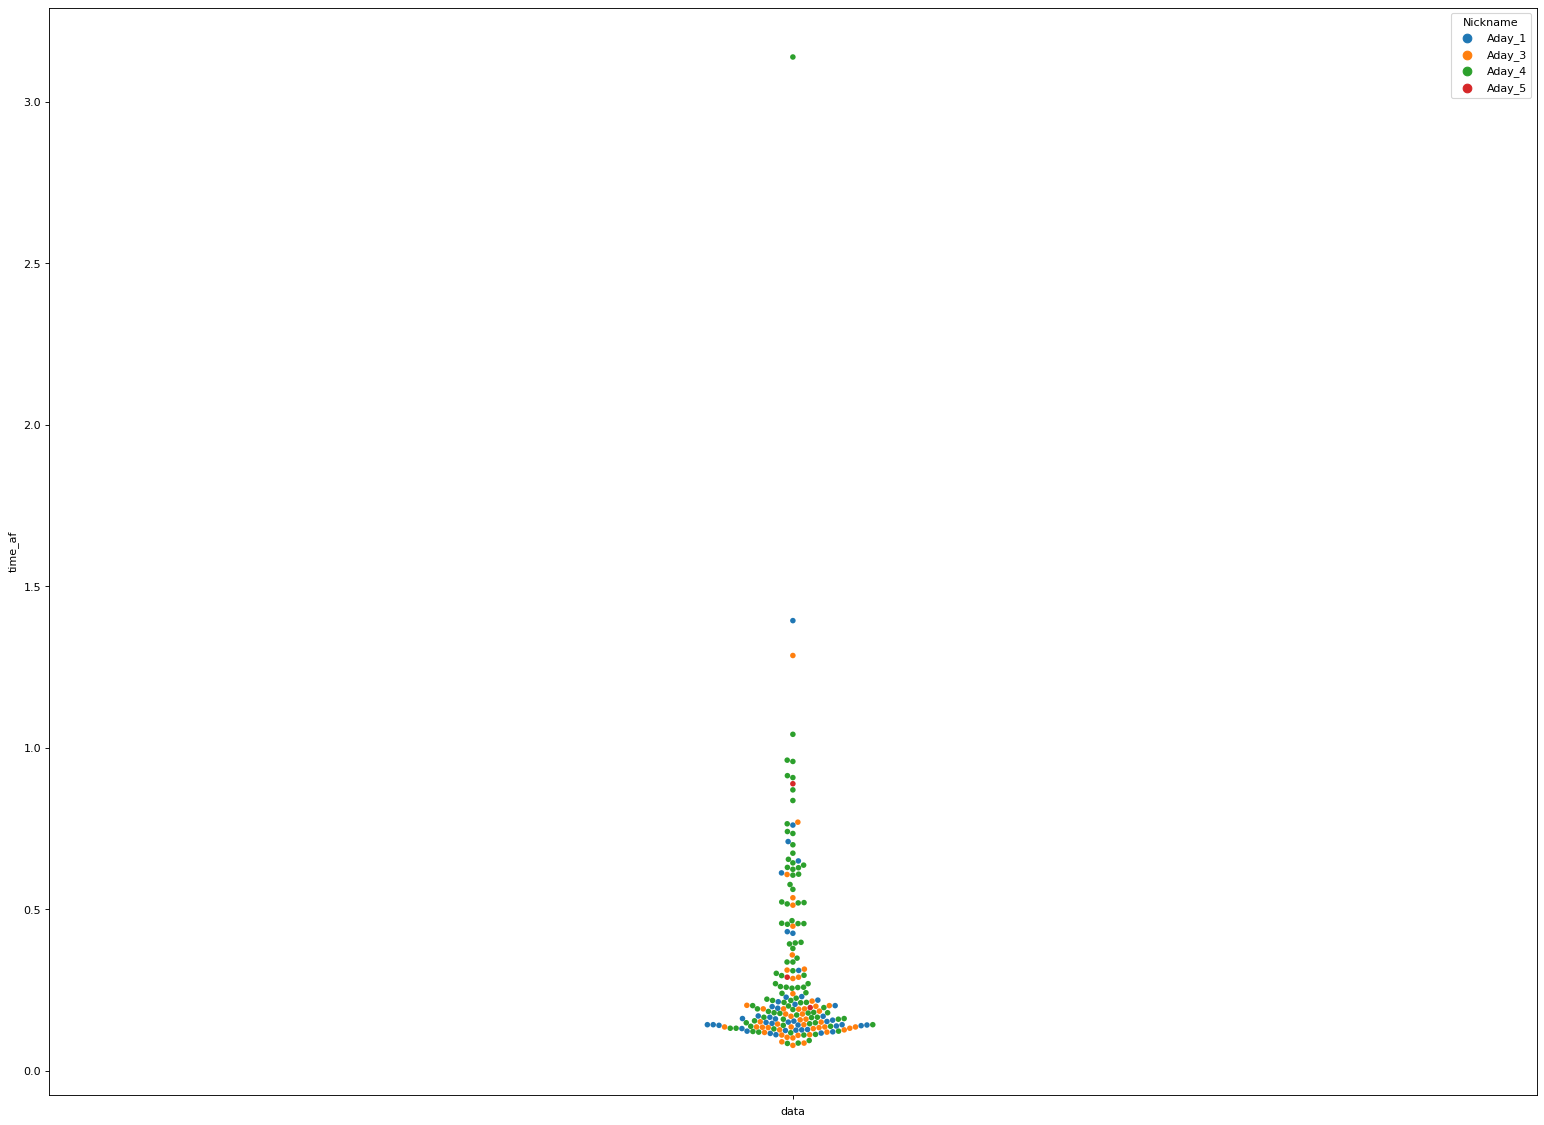

In [25]:
figure(figsize=(24, 18), dpi=80)
sns.swarmplot(x="data", y="time_af", hue='Nickname' ,data=df_n[(df_n['data']=='')& (df_n['EventType']=='KEY_CHAR')])

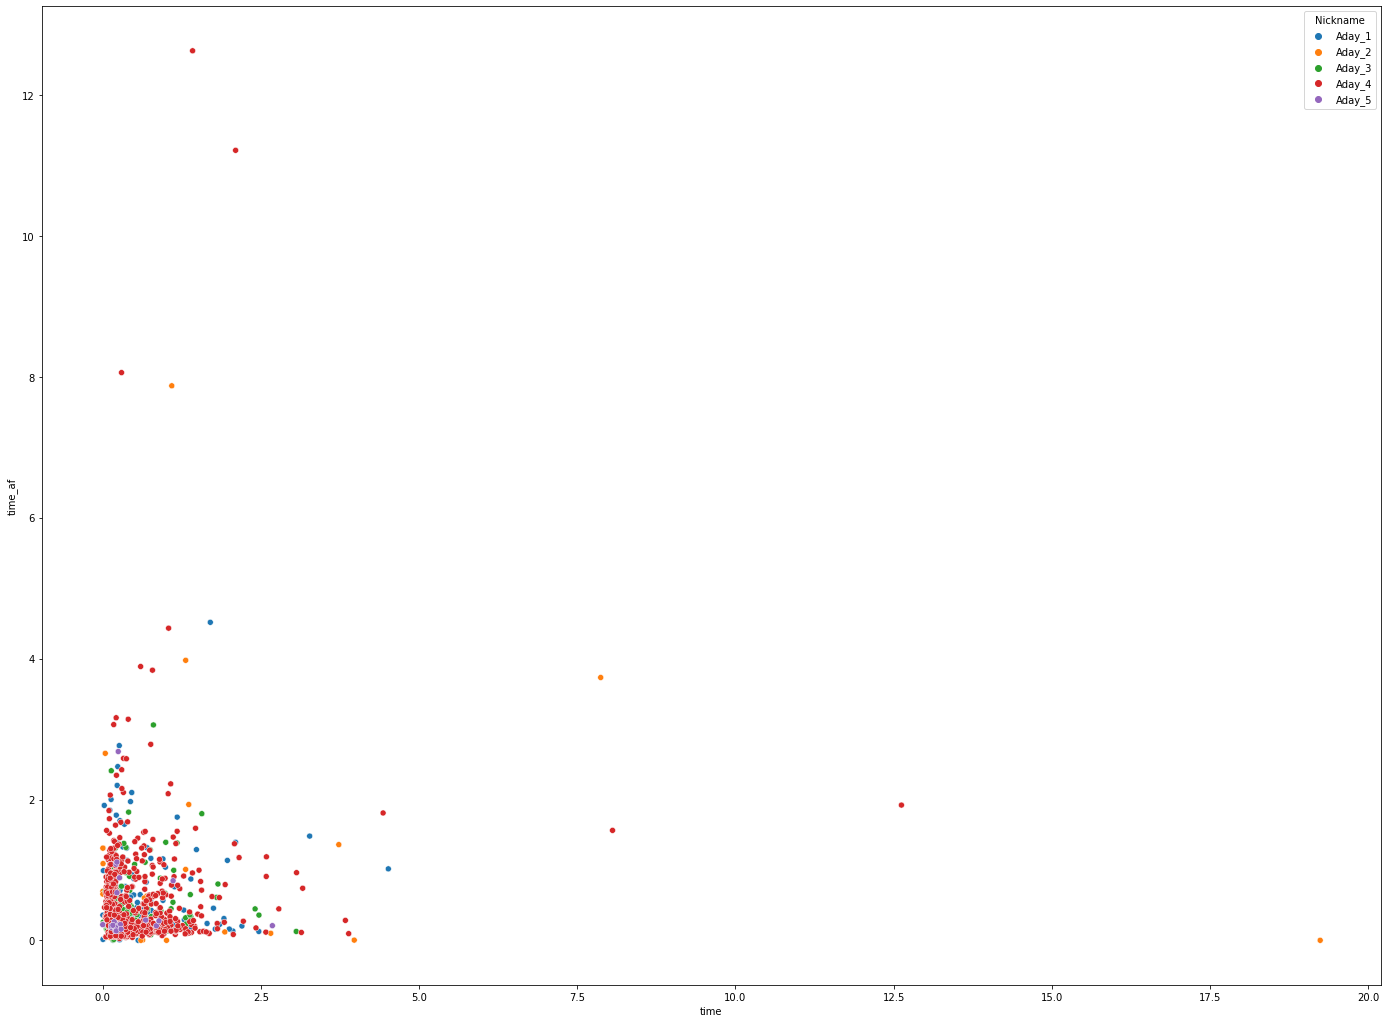

In [26]:
figure(figsize=(24, 18))
sns.scatterplot(x="time", y="time_af",hue="Nickname",  data=df_n)
plt.show()

<Figure size 1728x1296 with 0 Axes>

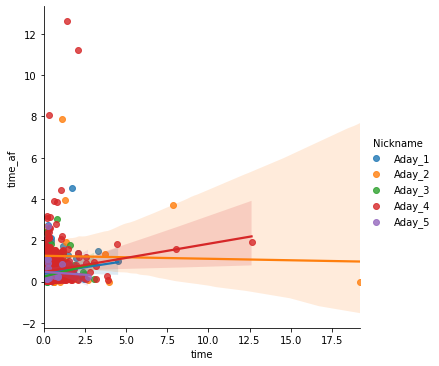

In [27]:
figure(figsize=(24, 18))
sns.lmplot(x="time", y="time_af",hue="Nickname",  data=df_n)

In [31]:
grpby = df_n.groupby('Nickname')
df_n_list=[]
for group in grpby.groups:
    df_n_list.append(grpby.get_group(group))
df_n_list[0]

,Nickname,StartTime,LogTime,EventType,data,time,time_af
9,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:45:57.469,KEY_CHAR,n,0.196,0.972
10,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:45:57.665,KEY_CHAR,o,0.293,0.196
11,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:45:57.958,KEY_CHAR,t,1.157,0.293
12,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:45:59.115,KEY_CHAR,e,0.952,1.157
13,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:46:00.067,KEY_CHAR,p,0.134,0.952
...,...,...,...,...,...,...,...
305,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:48:16.149,KEY_CHAR,w,0.203,0.377
306,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:48:16.352,KEY_CHAR,a,0.294,0.203
307,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:48:16.646,KEY_CHAR,r,1.289,0.294
308,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:48:17.935,KEY_CHAR,f,1.481,1.289


In [32]:
df_n_list[0].groupby('data').describe().T

data                             !      -      .         1         3  \
time    count  54.000000  5.000000  1.000  1.000  5.000000  5.000000   
        mean    0.811389  2.553800  0.002  0.206  0.363000  0.307000   
        std     0.559876  1.343356    NaN    NaN  0.190524  0.064351   
        min     0.010000  1.136000  0.002  0.206  0.214000  0.222000   
        25%     0.416000  1.750000  0.002  0.206  0.242000  0.266000   
        50%     0.682500  2.099000  0.002  0.206  0.305000  0.318000   
        75%     1.088750  3.270000  0.002  0.206  0.367000  0.343000   
        max     2.467000  4.514000  0.002  0.206  0.687000  0.386000   
time_af count  54.000000  5.000000  1.000  1.000  5.000000  5.000000   
        mean    0.426519  1.021800  0.360  0.547  0.953800  1.056800   
        std     0.706070  0.428537    NaN    NaN  0.501985  0.619770   
        min     0.002000  0.458000  0.360  0.547  0.559000  0.010000   
        25%     0.141250  0.761000  0.360  0.547  0.567000  1.137000   
        50%     0.161500  1.016000  0.360  0.547  0.827000  1.162000   
        75%     0.397250  1.393000  0.360  0.547  1.038000  1.326000   
        max     4.514000  1.481000  0.360  0.547  1.778000  1.649000   

data                  4         6         7         8  ...         s  \
time    count  6.000000  5.000000  5.000000  5.000000  ...  5.000000   
        mean   0.874333  0.297200  1.262800  0.211800  ...  0.133600   
        std    0.702763  0.117559  0.239150  0.028525  ...  0.018501   
        min    0.162000  0.181000  1.040000  0.169000  ...  0.112000   
        25%    0.569250  0.205000  1.137000  0.203000  ...  0.116000   
        50%    0.673000  0.257000  1.162000  0.212000  ...  0.143000   
        75%    0.920750  0.402000  1.326000  0.234000  ...  0.143000   
        max    2.200000  0.441000  1.649000  0.241000  ...  0.154000   
time_af count  6.000000  5.000000  5.000000  5.000000  ...  5.000000   
        mean   0.421000  0.307000  0.211800  0.363000  ...  0.177400   
        std    0.320959  0.064351  0.028525  0.190524  ...  0.037367   
        min    0.181000  0.222000  0.169000  0.214000  ...  0.137000   
        25%    0.218000  0.266000  0.203000  0.242000  ...  0.158000   
        50%    0.329500  0.318000  0.212000  0.305000  ...  0.174000   
        75%    0.431250  0.343000  0.234000  0.367000  ...  0.181000   
        max    1.040000  0.386000  0.241000  0.687000  ...  0.237000   

data                   t          u         v         w         x          y  \
time    count  11.000000  11.000000  5.000000  5.000000  5.000000  11.000000   
        mean    0.317091   0.309818  0.183600  0.205400  0.185600   0.396909   
        std     0.295092   0.220862  0.002191  0.018008  0.033381   0.207564   
        min     0.131000   0.015000  0.180000  0.194000  0.150000   0.127000   
        25%     0.151500   0.155500  0.184000  0.195000  0.151000   0.168000   
        50%     0.261000   0.262000  0.184000  0.198000  0.194000   0.439000   
        75%     0.311500   0.432500  0.184000  0.203000  0.214000   0.546500   
        max     1.157000   0.756000  0.186000  0.237000  0.219000   0.657000   
time_af count  11.000000  11.000000  5.000000  5.000000  5.000000  11.000000   
        mean    0.884636   0.254818  0.194400  0.295800  0.512800   0.267818   
        std     0.899221   0.183372  0.045943  0.131612  0.091713   0.123326   
        min     0.122000   0.024000  0.132000  0.191000  0.438000   0.142000   
        25%     0.210000   0.169500  0.164000  0.210000  0.439000   0.184500   
        50%     0.459000   0.180000  0.204000  0.212000  0.485000   0.237000   
        75%     1.438500   0.262500  0.230000  0.377000  0.545000   0.275500   
        max     2.765000   0.639000  0.242000  0.489000  0.657000   0.539000   

data                  z        ã§        ä±  
time    count  5.000000  2.000000  4.000000  
        mean   0.209400  0.494500  0.210000  
        std    0.060368  0.376888  0.101551  
     

In [33]:
df_n_list[1].groupby('data').describe().T

data                         a      d      e      n      o      p      t  \
time    count  6.000000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
        mean   1.511000  0.121  1.929  2.655  0.158  0.113  0.040  0.102   
        std    1.133440    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        min    0.658000  0.121  1.929  2.655  0.158  0.113  0.040  0.102   
        25%    0.849500  0.121  1.929  2.655  0.158  0.113  0.040  0.102   
        50%    1.310500  0.121  1.929  2.655  0.158  0.113  0.040  0.102   
        75%    1.347750  0.121  1.929  2.655  0.158  0.113  0.040  0.102   
        max    3.731000  0.121  1.929  2.655  0.158  0.113  0.040  0.102   
time_af count  6.000000  1.000  1.000  1.000  1.000  1.000  1.000  1.000   
        mean   1.584333  0.040  0.121  0.102  1.241  0.158  2.655  0.113   
        std    1.271883    NaN    NaN    NaN    NaN    NaN    NaN    NaN   
        min    0.603000  0.040  0.121  0.102  1.241  0.158  2.655  0.113   
        25%    0.725250  0.040  0.121  0.102  1.241  0.158  2.655  0.113   
        50%    1.184000  0.040  0.121  0.102  1.241  0.158  2.655  0.113   
        75%    1.786750  0.040  0.121  0.102  1.241  0.158  2.655  0.113   
        max    3.975000  0.040  0.121  0.102  1.241  0.158  2.655  0.113   

data           thequickonyxgoblinjumpsoverthe187364.lazydwarf!         v  
time    count                                         6.000000  6.000000  
        mean                                          4.424833  1.314667  
        std                                           7.368988  3.211445  
        min                                           0.603000  0.002000  
        25%                                           0.725250  0.002000  
        50%                                           1.049500  0.003500  
        75%                                           3.254000  0.006500  
        max                                          19.241000  7.870000  
time_af count                                         6.000000  6.000000  
        mean                                          1.314667  1.466167  
        std                                           3.211445  1.145860  
        min                                           0.002000  0.658000  
        25%                                           0.002000  0.794750  
        50%                                           0.003500  1.200500  
        75%                                           0.006500  1.310750  
        max                                           7.870000  3.731000

In [34]:
df_n_list[2].groupby('data').describe().T

data                             !      '      .         1         3  \
time    count  94.000000  5.000000  1.000  1.000  5.000000  5.000000   
        mean    0.376021  0.762600  0.910  0.987  0.251000  0.559000   
        std     0.371038  0.647820    NaN    NaN  0.055227  0.273284   
        min     0.079000  0.250000  0.910  0.987  0.200000  0.344000   
        25%     0.152000  0.366000  0.910  0.987  0.204000  0.380000   
        50%     0.217000  0.402000  0.910  0.987  0.233000  0.504000   
        75%     0.447750  0.996000  0.910  0.987  0.296000  0.542000   
        max     2.408000  1.799000  0.910  0.987  0.322000  1.025000   
time_af count  94.000000  5.000000  1.000  1.000  5.000000  5.000000   
        mean    0.329809  0.794400  0.884  0.670  0.260000  0.447400   
        std     0.379434  0.385207    NaN    NaN  0.134170  0.366325   
        min     0.079000  0.461000  0.884  0.670  0.143000  0.189000   
        25%     0.136500  0.544000  0.884  0.670  0.166000  0.200000   
        50%     0.176000  0.612000  0.884  0.670  0.184000  0.367000   
        75%     0.399250  0.962000  0.884  0.670  0.368000  0.401000   
        max     3.058000  1.393000  0.884  0.670  0.439000  1.080000   

data                  4      5         6         7  ...         s          t  \
time    count  5.000000  1.000  5.000000  5.000000  ...  7.000000  11.000000   
        mean   0.398600  0.287  0.376800  0.447400  ...  0.481000   0.244273   
        std    0.165063    NaN  0.411367  0.366325  ...  0.519622   0.099795   
        min    0.262000  0.287  0.141000  0.189000  ...  0.127000   0.132000   
        25%    0.288000  0.287  0.184000  0.200000  ...  0.133500   0.185500   
        50%    0.341000  0.287  0.216000  0.367000  ...  0.286000   0.199000   
        75%    0.432000  0.287  0.233000  0.401000  ...  0.560500   0.284000   
        max    0.670000  0.287  1.110000  1.080000  ...  1.566000   0.429000   
time_af count  5.000000  1.000  5.000000  5.000000  ...  7.000000  11.000000   
        mean   0.376800  0.344  0.511200  0.820800  ...  0.379286   0.582364   
        std    0.411367    NaN  0.334366  0.453769  ...  0.626365   0.584920   
        min    0.141000  0.344  0.105000  0.450000  ...  0.110000   0.145000   
        25%    0.184000  0.344  0.380000  0.460000  ...  0.135000   0.186000   
        50%    0.216000  0.344  0.504000  0.563000  ...  0.142000   0.217000   
        75%    0.233000  0.344  0.542000  1.311000  ...  0.167000   0.815500   
        max    1.110000  0.344  1.025000  1.320000  ...  1.799000   1.821000   

data                   u         v         w         x          y         z  \
time    count  14.000000  5.000000  5.000000  6.000000  11.000000  5.000000   
        mean    0.226143  0.182600  0.133600  0.209667   0.219000  0.251400   
        std     0.066968  0.037119  0.035374  0.163681   0.074665  0.043655   
        min     0.160000  0.152000  0.096000  0.090000   0.110000  0.194000   
        25%     0.192000  0.160000  0.106000  0.138250   0.162500  0.234000   
        50%     0.202500  0.161000  0.130000  0.148000   0.192000  0.241000   
        75%     0.218250  0.200000  0.153000  0.187750   0.289500  0.282000   
        max     0.390000  0.240000  0.183000  0.536000   0.312000  0.306000   
time_af count  14.000000  5.000000  5.000000  6.000000  11.000000  5.000000   
        mean    0.260929  0.159600  0.315000  0.274667   0.201545  0.185400   
        std     0.210362  0.026633  0.203799  0.043154   0.061627  0.015060   
        min     0.098000  0.136000  0.157000  0.191000   0.113000  0.168000   
        25%     0.147750  0.142000  0.234000  0.274750   0.156000  0.177000   
        50%     0.201500  0.143000  0.246000  0.289500   0.194000  0.184000   
        75%     0.248250  0.185000  0.266000  0.294500   0.237500  0.190000   
        max     0.919000  0.192000  0.672000  0.312000   0.306000  0.208000   

data                 ã§         ä±  
time    count  5.000000  12.00000

In [35]:
df_n_list[3].groupby('data').describe().T

data                               !         .          1          3  \
time    count  180.000000  10.000000  2.000000  10.000000  11.000000   
        mean     0.823067   2.749100  0.135500   0.505700   0.537636   
        std      0.772530   3.653890  0.007778   0.142822   0.192919   
        min      0.048000   0.783000  0.130000   0.300000   0.286000   
        25%      0.347000   0.863250  0.132750   0.383500   0.384000   
        50%      0.759000   1.166000  0.135500   0.537000   0.507000   
        75%      1.035750   2.460750  0.138250   0.641000   0.620500   
        max      8.057000  12.623000  0.141000   0.671000   0.986000   
time_af count  180.000000  10.000000  2.000000  10.000000  11.000000   
        mean     0.543278   1.764400  0.789000   1.100200   1.383000   
        std      0.979707   0.816259  0.049497   0.527729   0.926907   
        min      0.048000   0.941000  0.754000   0.711000   0.377000   
        25%      0.172000   1.372750  0.771500   0.770750   0.890500   
        50%      0.257000   1.491000  0.789000   0.935500   1.311000   
        75%      0.638750   1.893000  0.806500   1.114750   1.539500   
        max     11.211000   3.835000  0.824000   2.422000   3.887000   

data                   4          6          7          8          a  ...  \
time    count  10.000000  10.000000  10.000000  10.000000  23.000000  ...   
        mean    1.295000   0.120200   1.433100   0.104100   0.241652  ...   
        std     0.546727   0.022365   0.961218   0.020146   0.157742  ...   
        min     0.754000   0.070000   0.377000   0.062000   0.067000  ...   
        25%     0.898250   0.118000   0.956500   0.099500   0.104500  ...   
        50%     1.189500   0.120500   1.326500   0.102500   0.199000  ...   
        75%     1.535000   0.129750   1.608250   0.111750   0.383500  ...   
        max     2.578000   0.158000   3.887000   0.144000   0.568000  ...   
time_af count  10.000000  10.000000  10.000000  10.000000  23.000000  ...   
        mean    0.120200   0.492800   0.104100   0.505700   0.217826  ...   
        std     0.022365   0.129548   0.020146   0.142822   0.068637  ...   
        min     0.070000   0.286000   0.062000   0.300000   0.102000  ...   
        25%     0.118000   0.379500   0.099500   0.383500   0.177500  ...   
        50%     0.120500   0.505500   0.102500   0.537000   0.217000  ...   
        75%     0.129750   0.611750   0.111750   0.641000   0.254500  ...   
        max     0.158000   0.652000   0.144000   0.671000   0.410000  ...   

data                   s          t          u          v          w  \
time    count  12.000000  23.000000  21.000000  10.000000  10.000000   
        mean    0.452500   0.196261   0.647333   0.276300   0.275100   
        std     0.370245   0.128710   0.227270   0.145814   0.052123   
        min     0.138000   0.028000   0.256000   0.204000   0.230000   
        25%     0.208500   0.079000   0.514000   0.217500   0.245500   
        50%     0.298000   0.272000   0.611000   0.220000   0.263500   
        75%     0.607750   0.297500   0.684000   0.252250   0.285000   
        max     1.420000   0.440000   1.183000   0.685000   0.410000   
time_af count  12.000000  23.000000  21.000000  10.000000  10.000000   
        mean    1.209333   1.201522   0.163714   0.208200   0.139900   
        std     3.594500   1.567647   0.048021   0.087157   0.122587   
        min     0.123000   0.183000   0.089000   0.111000   0.061000   
        25%     0.157500   0.629500   0.127000   0.157500   0.090000   
        50%     0.170500   0.835000   0.174000   0.192000   0.108500   
        75%     0.191750   1.064500   0.192000   0.231250   0.120000   
        max    12.623000   8.057000   0.270000   0.426000   0.484000   

data                   x          y          z         ã§         ä±  
time    count  10.000000  21.000000  11.000000  10.000000  20.000000  
        mean    0.552500   0.321000   0.176091   0.481400   0.474100  
        std     0.173474   

In [36]:
df_n_list[4].groupby('data').describe().T

data                         b      c      e      g      h         i      j  \
time    count  5.000000  1.000  1.000  1.000  1.000  1.000  2.000000  1.000   
        mean   0.804200  0.136  0.848  0.196  0.181  0.193  0.184000  0.224   
        std    1.068083    NaN    NaN    NaN    NaN    NaN  0.033941    NaN   
        min    0.186000  0.136  0.848  0.196  0.181  0.193  0.160000  0.224   
        25%    0.210000  0.136  0.848  0.196  0.181  0.193  0.172000  0.224   
        50%    0.266000  0.136  0.848  0.196  0.181  0.193  0.184000  0.224   
        75%    0.678000  0.136  0.848  0.196  0.181  0.193  0.196000  0.224   
        max    2.681000  0.136  0.848  0.196  0.181  0.193  0.208000  0.224   
time_af count  5.000000  1.000  1.000  1.000  1.000  1.000  2.000000  1.000   
        mean   0.533200  0.208  0.208  0.193  0.266  0.245  0.207500  0.678   
        std    0.419520    NaN    NaN    NaN    NaN    NaN  0.012021    NaN   
        min    0.196000  0.208  0.208  0.193  0.266  0.245  0.199000  0.678   
        25%    0.210000  0.208  0.208  0.193  0.266  0.245  0.203250  0.678   
        50%    0.290000  0.208  0.208  0.193  0.266  0.245  0.207500  0.678   
        75%    0.889000  0.208  0.208  0.193  0.266  0.245  0.211750  0.678   
        max    1.081000  0.208  0.208  0.193  0.266  0.245  0.216000  0.678   

data               k      l         n         o      q      t         u  \
time    count  1.000  1.000  2.000000  2.000000  1.000  1.000  2.000000   
        mean   1.112  0.216  0.258000  0.216000  0.137  0.245  0.099500   
        std      NaN    NaN  0.045255  0.011314    NaN    NaN  0.140714   
        min    1.112  0.216  0.226000  0.208000  0.137  0.245  0.000000   
        25%    1.112  0.216  0.242000  0.212000  0.137  0.245  0.049750   
        50%    1.112  0.216  0.258000  0.216000  0.137  0.245  0.099500   
        75%    1.112  0.216  0.274000  0.220000  0.137  0.245  0.149250   
        max    1.112  0.216  0.290000  0.224000  0.137  0.245  0.199000   
time_af count  1.000  1.000  2.000000  2.000000  1.000  1.000  2.000000   
        mean   0.848  0.136  0.192000  0.646500  0.186  2.681  0.180500   
        std      NaN    NaN  0.045255  0.658316    NaN    NaN  0.061518   
        min    0.848  0.136  0.160000  0.181000  0.186  2.681  0.137000   
        25%    0.848  0.136  0.176000  0.413750  0.186  2.681  0.158750   
        50%    0.848  0.136  0.192000  0.646500  0.186  2.681  0.180500   
        75%    0.848  0.136  0.208000  0.879250  0.186  2.681  0.202250   
        max    0.848  0.136  0.224000  1.112000  0.186  2.681  0.224000   

data               x      y  
time    count  1.000  1.000  
        mean   0.889  0.278  
        std      NaN    NaN  
        min    0.889  0.278  
        25%    0.889  0.278  
        50%    0.889  0.278  
        75%    0.889  0.278  
        max    0.889  0.278  
time_af count  1.000  1.000  
        mean   0.278  0.226  
        std      NaN    NaN  
        min    0.278  0.226  
        25%    0.278  0.226  
        50%    0.278  0.226  
        75%    0.278  0.226  
        max    0.278  0.226

In [37]:
from sklearn import preprocessing
pre = preprocessing.LabelEncoder()
pre.fit(df_n['data'].values)
df_n['data']=pre.transform(df_n['data'].values)
df_n[df_n['data']==1]

,Nickname,StartTime,LogTime,EventType,data,time,time_af
77,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:46:34.899,KEY_SPECIAL,1,2.099,1.393
137,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:46:57.240,KEY_SPECIAL,1,1.136,0.761
194,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:47:21.796,KEY_SPECIAL,1,1.750,0.458
252,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:47:50.813,KEY_SPECIAL,1,4.514,1.016
309,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:48:19.416,KEY_SPECIAL,1,3.270,1.481
464,Aday_3,2021-08-18 03:55:40.206,2021-08-18 03:56:50.691,KEY_SPECIAL,1,0.996,1.393
536,Aday_3,2021-08-18 03:55:40.206,2021-08-18 03:57:13.775,KEY_SPECIAL,1,0.366,0.962
604,Aday_3,2021-08-18 03:55:40.206,2021-08-18 03:57:33.327,KEY_SPECIAL,1,0.250,0.461
669,Aday_3,2021-08-18 03:55:40.206,2021-08-18 03:57:47.896,KEY_SPECIAL,1,0.402,0.544
728,Aday_3,2021-08-18 03:55:40.206,2021-08-18 03:58:01.146,KEY_SPECIAL,1,1.799,0.612


In [38]:
grpby = df_n.groupby('Nickname')
df_n_list=[]
for group in grpby.groups:
    df_n_list.append(grpby.get_group(group))
df_n_list[0]

,Nickname,StartTime,LogTime,EventType,data,time,time_af
9,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:45:57.469,KEY_CHAR,25,0.196,0.972
10,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:45:57.665,KEY_CHAR,26,0.293,0.196
11,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:45:57.958,KEY_CHAR,31,1.157,0.293
12,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:45:59.115,KEY_CHAR,16,0.952,1.157
13,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:46:00.067,KEY_CHAR,27,0.134,0.952
...,...,...,...,...,...,...,...
305,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:48:16.149,KEY_CHAR,35,0.203,0.377
306,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:48:16.352,KEY_CHAR,12,0.294,0.203
307,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:48:16.646,KEY_CHAR,29,1.289,0.294
308,Aday_1,2021-08-18 03:45:40.216,2021-08-18 03:48:17.935,KEY_CHAR,17,1.481,1.289


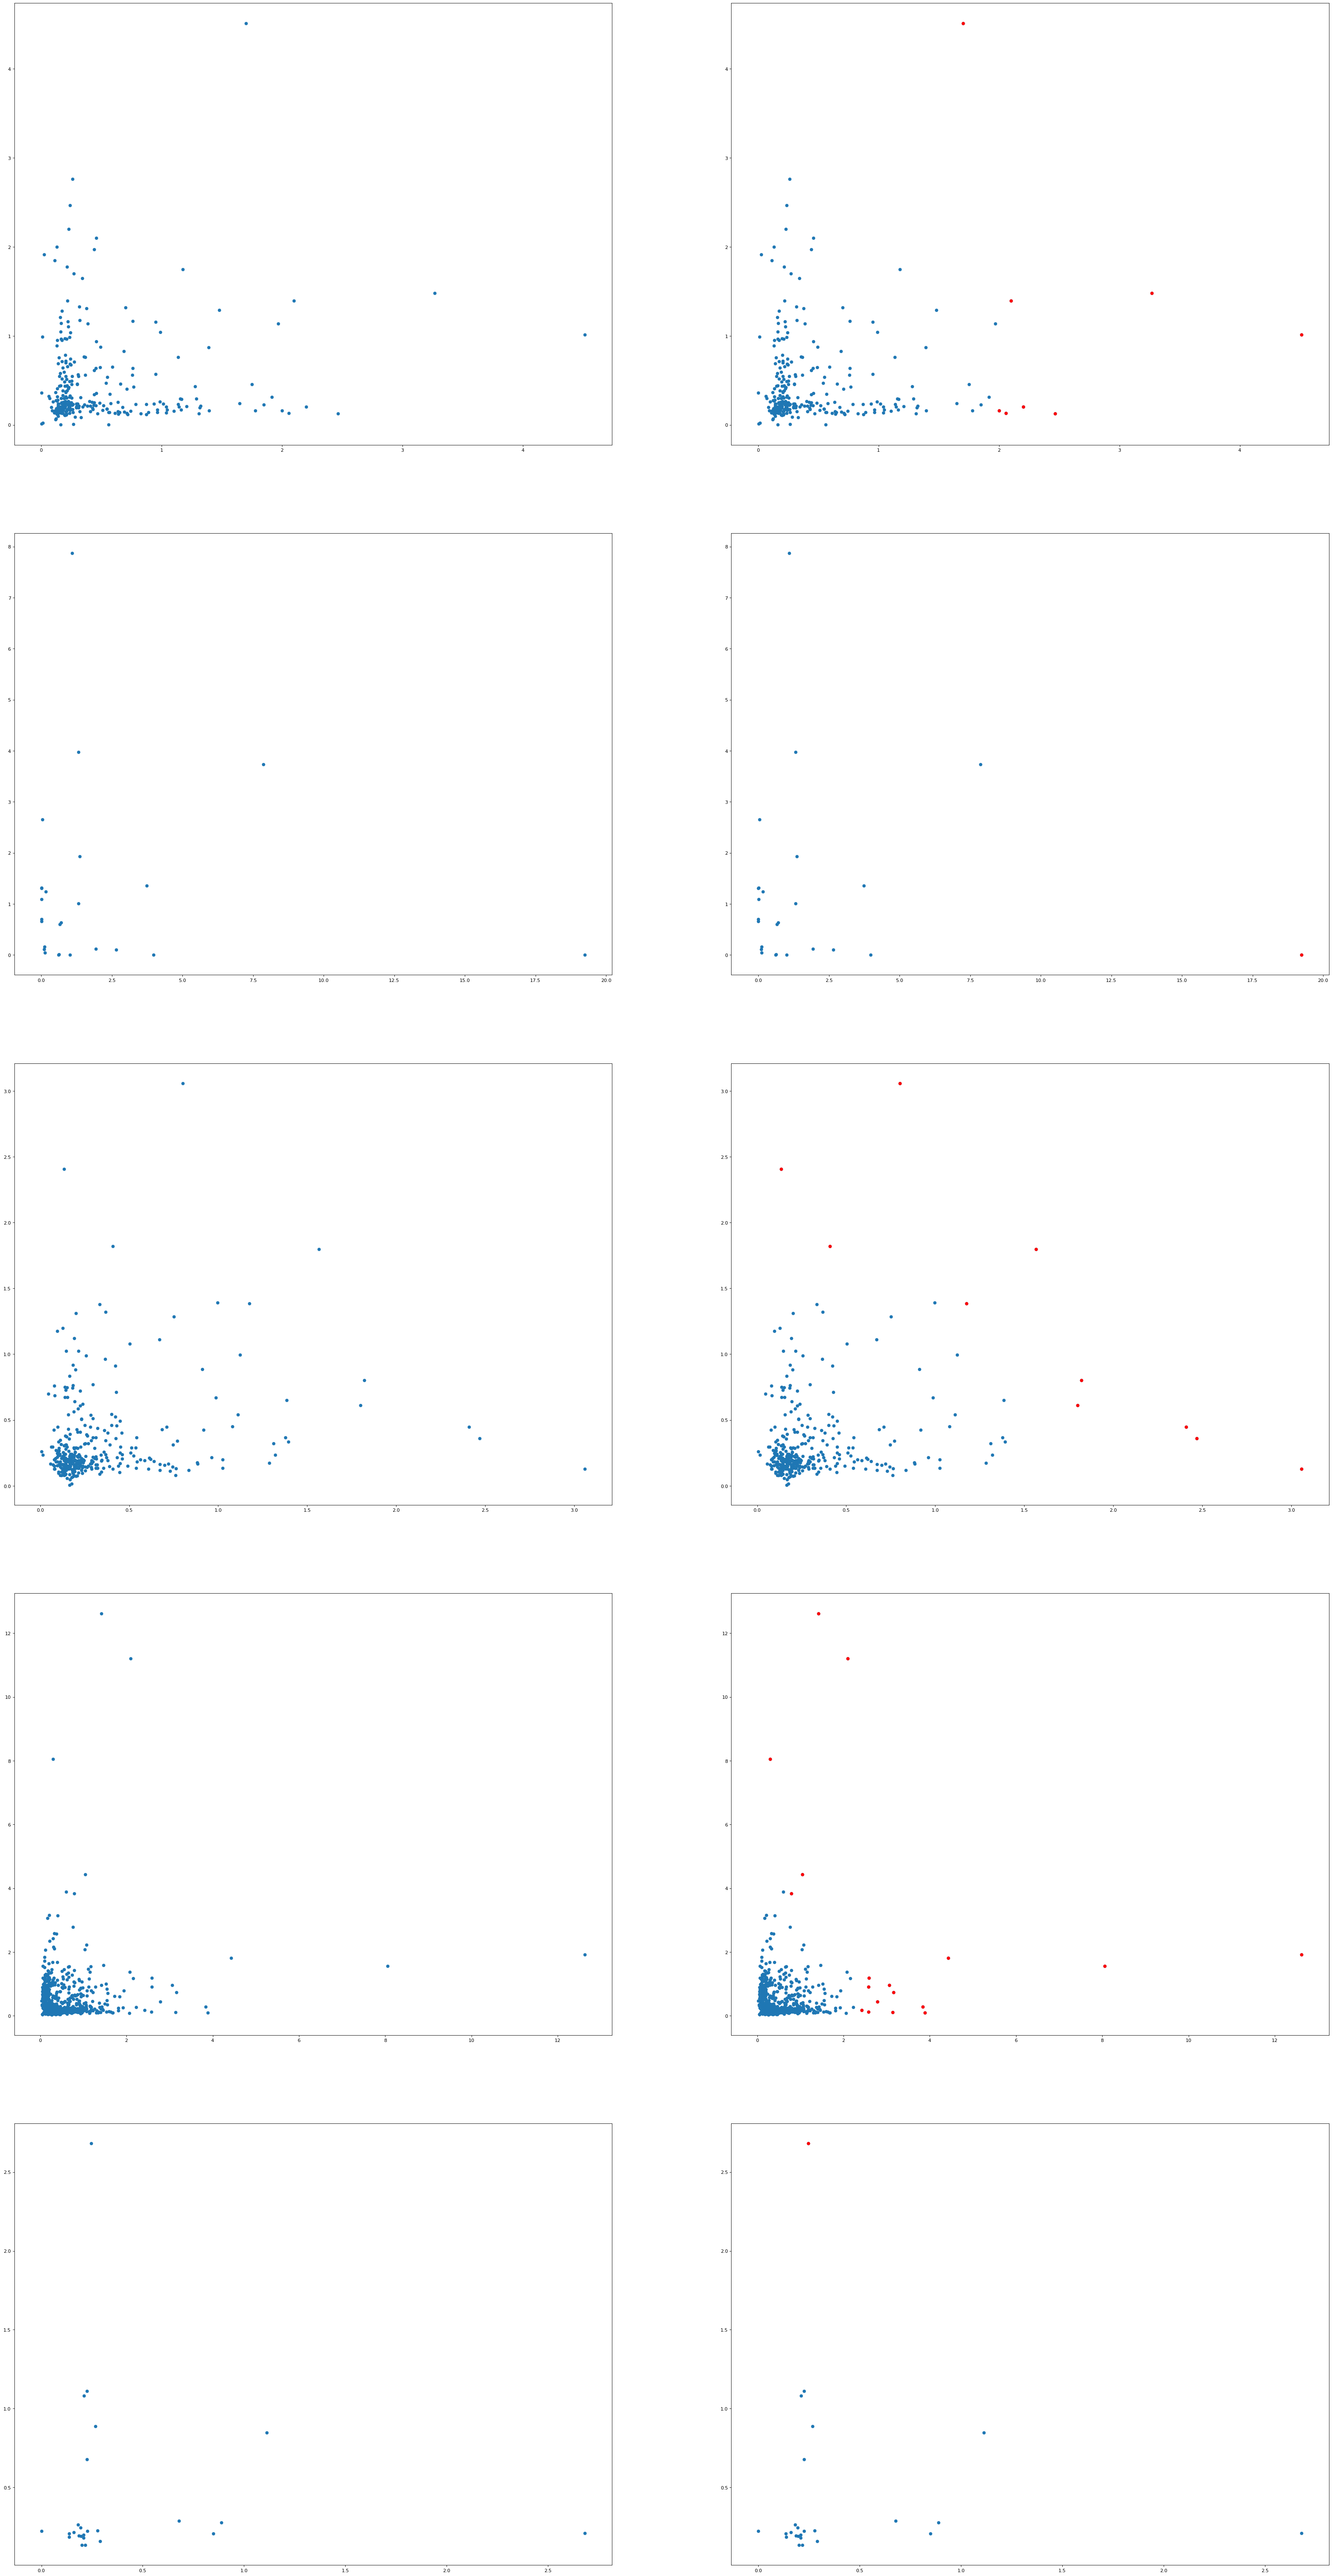

In [39]:
from sklearn.covariance import EllipticEnvelope
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(50,100),dpi=80)
i=0
elpenv = [EllipticEnvelope(contamination=0.025, random_state=1),
          EllipticEnvelope(contamination=0.025, random_state=1),
        EllipticEnvelope(contamination=0.025, random_state=1),
        EllipticEnvelope(contamination=0.025, random_state=1),
         EllipticEnvelope(contamination=0.025, random_state=1)]
for row in axes:
    row[0].scatter(x=df_n_list[i]['time'], y=df_n_list[i]["time_af"])
    X=df_n_list[i][['time','time_af']].values
    pred=elpenv[i].fit_predict(X)
    outlier_index = np.where(pred==-1)
    outlier_values = X[outlier_index]
    row[1].scatter(x=X[:,0], y=X[:,1])
    row[1].scatter(x=outlier_values[:,0], y=outlier_values[:,1], color='r')    
    i+=1
plt.show()

In [40]:
for i in range(5):
    print(elpenv[i].predict(np.array([[5.192,5.188]])))

[-1]
[1]
[-1]
[-1]
[-1]


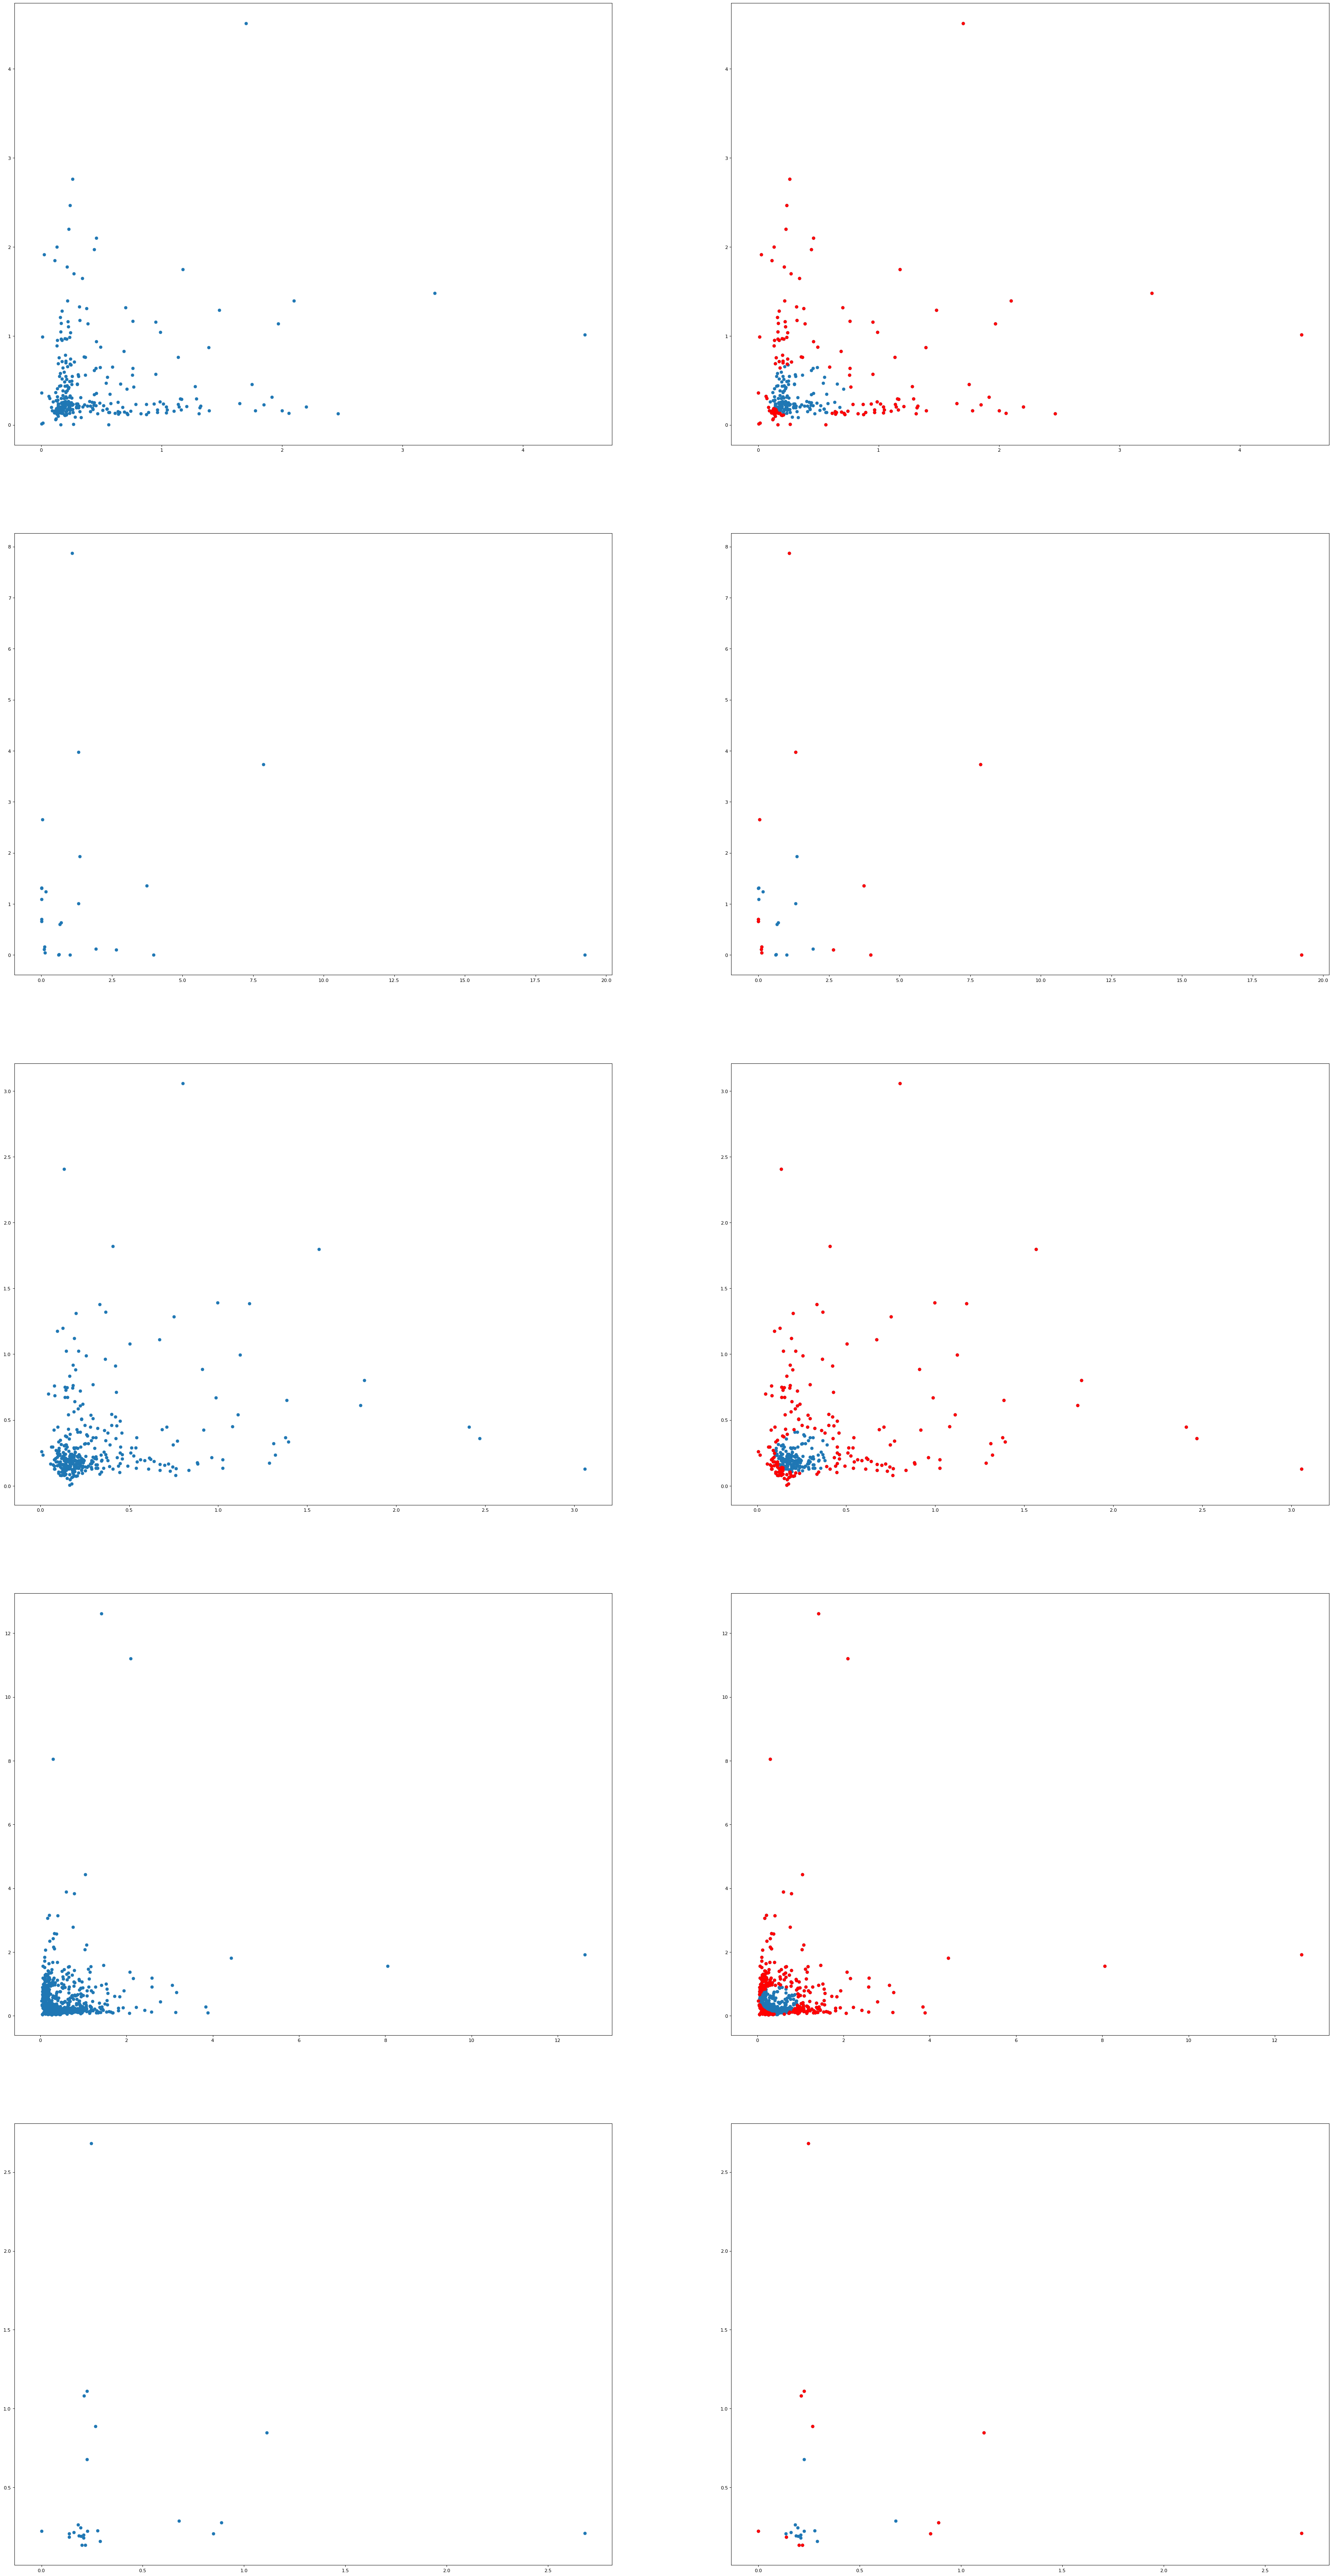

In [41]:
from sklearn.svm import OneClassSVM
fig, axes = plt.subplots(nrows=5, ncols=2,figsize=(50,100),dpi=80)
i=0
ocsvm = [OneClassSVM(kernel='rbf', degree=3, gamma='scale'),
          OneClassSVM(kernel='rbf', degree=3, gamma='scale'),
        OneClassSVM(kernel='rbf', degree=3, gamma='scale'),
        OneClassSVM(kernel='rbf', degree=3, gamma='scale'),
         OneClassSVM(kernel='rbf', degree=3, gamma='scale')]
for row in axes:
    row[0].scatter(x=df_n_list[i]['time'], y=df_n_list[i]["time_af"])
    X=df_n_list[i][['time','time_af']].values
    pred=ocsvm[i].fit_predict(X)
    outlier_index = np.where(pred==-1)
    outlier_values = X[outlier_index]
    row[1].scatter(x=X[:,0], y=X[:,1])
    row[1].scatter(x=outlier_values[:,0], y=outlier_values[:,1], color='r')    
    i+=1
plt.show()

In [42]:
for i in range(5):
    print(ocsvm[i].predict(np.array([[0.192,0.188]])))

[1]
[-1]
[1]
[1]
[1]


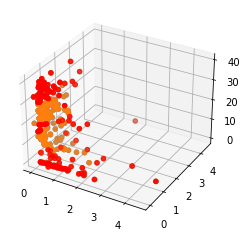

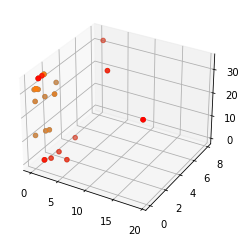

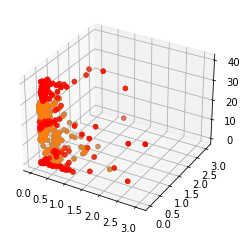

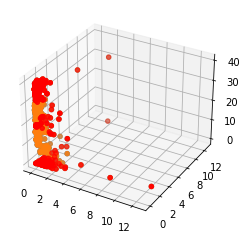

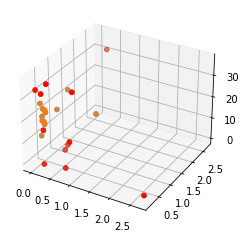

In [43]:
from sklearn.svm import OneClassSVM

i=0
ocsvm = [OneClassSVM(kernel='rbf', degree=3, gamma='scale'),
          OneClassSVM(kernel='rbf', degree=3, gamma='scale'),
        OneClassSVM(kernel='rbf', degree=3, gamma='scale'),
        OneClassSVM(kernel='rbf', degree=3, gamma='scale'),
         OneClassSVM(kernel='rbf', degree=3, gamma='scale')]
decode=[]
for i in range(5):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    X=df_n_list[i][['time','time_af','data']].values
    #pre = preprocessing.LabelEncoder()
    #pre.fit(X[:,2])
    #X[:,2]=pre.transform(X[:,2])
    ax.scatter(xs=X[:,0], ys=X[:,1],zs=X[:,2])
    pred=ocsvm[i].fit_predict(X)
    outlier_index = np.where(pred==-1)
    outlier_values = X[outlier_index]
    ax.scatter(xs=X[:,0], ys=X[:,1],zs=X[:,2])
    ax.scatter(xs=outlier_values[:,0], ys=outlier_values[:,1],zs=outlier_values[:,2], color='r')
    plt.show()
    i+=1


In [44]:
for i in range(5):
    print(ocsvm[i].predict(np.array([[0.192,0.188,1]])))

[-1]
[1]
[1]
[1]
[-1]


In [49]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix 
from sklearn import svm
X=df_n[['time','time_af','data']].values
y=df_n['Nickname']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [51]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svc_params = {"C": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100],
             "gamma": [0.0001, 0.001, 0.1, 1, 5, 10 ,50 ,100]}
svc = SVC()
svc_cv_model = GridSearchCV(svc, svc_params, 
                         cv = 10, 
                         n_jobs = -1,
                         verbose = 2)

svc_cv_model.fit(X_train, y_train)

Fitting 10 folds for each of 64 candidates, totalling 640 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 640 out of 640 | elapsed:   27.1s finished


GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1, 5, 10, 50, 100]},
             verbose=2)

In [52]:
print(svc_cv_model.best_params_)

{'C': 50, 'gamma': 10}


In [53]:
svc_tuned = SVC(C = 50, gamma = 10).fit(X_train, y_train)

In [54]:
y_pred = svc_tuned.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 28,   1,  22,  29,   1],
       [  0,   4,   1,   7,   0],
       [ 16,   1,  60,  40,   1],
       [ 20,   1,  27, 158,   2],
       [  2,   0,   3,   2,   0]], dtype=int64)

In [56]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.5868544600938967

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [59]:
rf_model

RandomForestClassifier()

In [60]:
y_pred = rf_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[ 26,   0,  21,  34,   0],
       [  1,   6,   1,   4,   0],
       [ 17,   0,  57,  44,   0],
       [ 12,   0,  19, 177,   0],
       [  0,   0,   4,   3,   0]], dtype=int64)

In [61]:
accuracy_score(y_test, y_pred)

0.6244131455399061

In [62]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb_model = nb.fit(X_train, y_train)
nb_model

GaussianNB()

In [63]:
y_pred = nb_model.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[  2,   2,  55,  22,   0],
       [  0,   2,   3,   7,   0],
       [  1,   0, 101,  16,   0],
       [  0,   3, 125,  80,   0],
       [  0,   0,   6,   1,   0]], dtype=int64)

In [64]:
accuracy_score(y_test, y_pred)

0.43427230046948356

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [67]:
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, knn_params, cv=10)
knn_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [68]:
knn_cv.best_params_

{'n_neighbors': 4}

In [69]:
knn = KNeighborsClassifier(n_neighbors=4)
knn_model = knn.fit(X_train, y_train)
knn_model

KNeighborsClassifier(n_neighbors=4)

In [70]:
y_pred = knn_model.predict(X_test)

In [71]:
confusion_matrix(y_test, y_pred)

array([[ 32,   0,  23,  26,   0],
       [  3,   2,   1,   6,   0],
       [ 29,   0,  55,  34,   0],
       [ 27,   0,  27, 154,   0],
       [  3,   0,   2,   2,   0]], dtype=int64)

In [72]:
accuracy_score(y_test, y_pred)

0.5704225352112676

In [73]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [74]:
mlpc = MLPClassifier().fit(X_train, y_train)
y_pred = mlpc.predict(X_test)
confusion_matrix(y_test, y_pred)

C:\Users\suca\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[  0,   0,   7,  74,   0],
       [  0,   1,   0,  11,   0],
       [  0,   0,  24,  94,   0],
       [  0,   1,  13, 194,   0],
       [  0,   0,   0,   7,   0]], dtype=int64)

In [75]:
accuracy_score(y_test, y_pred)

0.5140845070422535

In [76]:
mlpc = MLPClassifier().fit(X_train_scaled, y_train)
y_pred = mlpc.predict(X_test_scaled)
confusion_matrix(y_test, y_pred)

C:\Users\suca\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


array([[  0,   0,  13,  68,   0],
       [  0,   1,   1,  10,   0],
       [  0,   0,  44,  74,   0],
       [  0,   1,  19, 188,   0],
       [  0,   0,   3,   4,   0]], dtype=int64)

In [77]:
accuracy_score(y_test, y_pred)

0.5469483568075117